
                                                      
                                                Course Project - Exploratory Data Analysis

#1(Find a real-world dataset of your choice online)
 1(EDA on the Iris Dataset) going with this dataset

In [3]:
#load the dataset
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


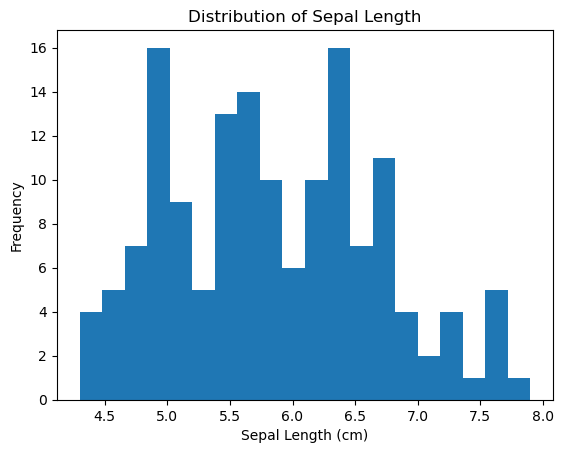

In [5]:
#2(univariate analysis)
import matplotlib.pyplot as plt
plt.hist(df['sepal length (cm)'], bins=20)
plt.title('Distribution of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.show()

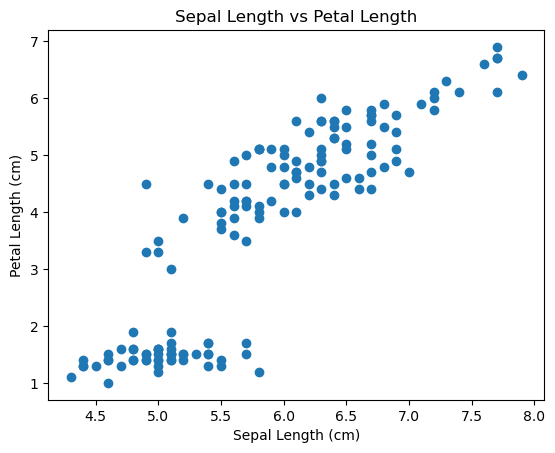

In [7]:
#3(bivariate analysis)
plt.scatter(df['sepal length (cm)'], df['petal length (cm)'])
plt.title('Sepal Length vs Petal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.show()

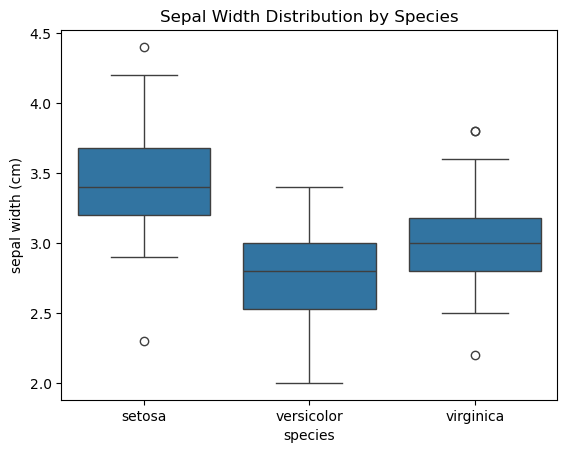

In [9]:
#4(blox plot)
import seaborn as sns
sns.boxplot(x='species', y='sepal width (cm)', data=df)
plt.title('Sepal Width Distribution by Species')
plt.show()

In [17]:
#5(correlation)
corr = df.drop('species', axis=1).corr()
print(corr)

numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()
print(corr)

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  


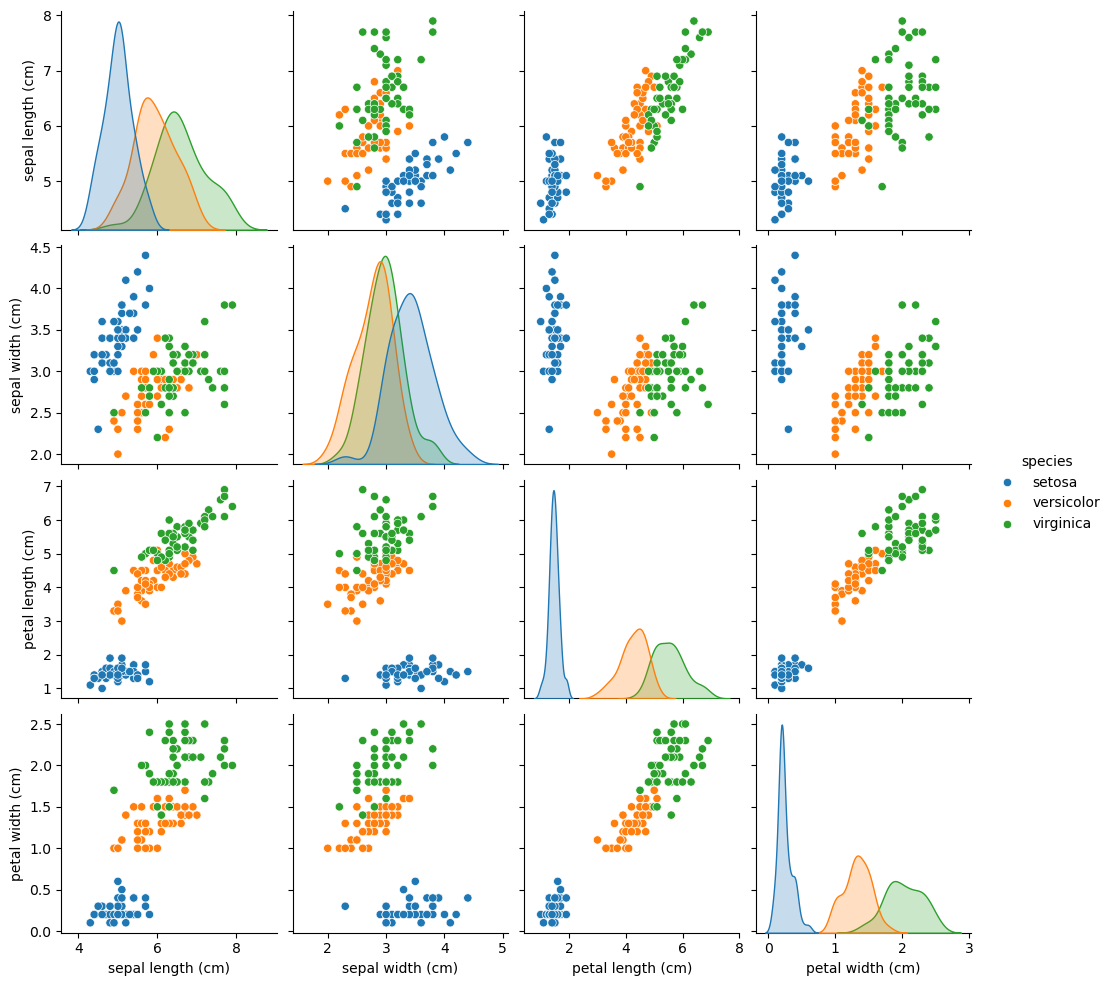

In [24]:
#6(pair plot)
sns.pairplot(df, hue='species')
plt.show()

#2(Use Numpy & Pandas to parse, clean & analyze data?)

In [1]:
#1 Import Required Libraries
import numpy as np 
import pandas as pd
#Load Data into a DataFrame
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Age': [25, np.nan, 30, 29, 22],  # Missing value for Bob
    'City': ['New York', 'Los Angeles', 'Chicago', 'New York', np.nan],  # Missing value for Eve
    'Salary': ['50000', '60000', 'NaN', '45000', '55000']  # 'NaN' as string
}
df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)

Original DataFrame:
      Name   Age         City Salary
0    Alice  25.0     New York  50000
1      Bob   NaN  Los Angeles  60000
2  Charlie  30.0      Chicago    NaN
3    David  29.0     New York  45000
4      Eve  22.0          NaN  55000


In [3]:
#clean the data
#(handling missing values)
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['City'] = df['City'].fillna('Unknown')
df['Salary'] = df['Salary'].replace('NaN', np.nan)
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')
print("\nDataFrame after cleaning:")
print(df)


Missing values:
Name      0
Age       1
City      1
Salary    0
dtype: int64

DataFrame after cleaning:
      Name   Age         City   Salary
0    Alice  25.0     New York  50000.0
1      Bob  26.5  Los Angeles  60000.0
2  Charlie  30.0      Chicago      NaN
3    David  29.0     New York  45000.0
4      Eve  22.0      Unknown  55000.0


In [5]:
#remove duplicate
df = df.drop_duplicates()

In [7]:
#(change data type)
df['Age'] = df['Age'].astype(int)

In [15]:
#4(analyse the data)
print("\nDescriptive statistics:")
print(df.describe())
print("\nUnique values in 'City' column:")
print(df['City'].value_counts())


#filtering data
print("\nPeople older than 25:")
print(df[df['Age'] > 25])
print("\nPeople in New York:")
print(df[df['City'] == 'New York'])


#group by analysis
print("\nAverage salary by city:")
print(df.groupby('City')['Salary'].mean())


#advanced analysis with numpy
#
print(df[['Age', 'Salary']].isnull().sum())
#
df_clean = df.dropna(subset=['Age', 'Salary'])
print("\nShape of DataFrame after dropping rows with NaN in 'Age' or 'Salary':")
print(df_clean.shape)
correlation = np.corrcoef(df_clean['Age'], df_clean['Salary'])
print("\nCorrelation between 'Age' and 'Salary':")
print(correlation)


Descriptive statistics:
             Age        Salary
count   5.000000      4.000000
mean   26.400000  52500.000000
std     3.209361   6454.972244
min    22.000000  45000.000000
25%    25.000000  48750.000000
50%    26.000000  52500.000000
75%    29.000000  56250.000000
max    30.000000  60000.000000

Unique values in 'City' column:
City
New York       2
Los Angeles    1
Chicago        1
Unknown        1
Name: count, dtype: int64

People older than 25:
      Name  Age         City   Salary
1      Bob   26  Los Angeles  60000.0
2  Charlie   30      Chicago      NaN
3    David   29     New York  45000.0

People in New York:
    Name  Age      City   Salary
0  Alice   25  New York  50000.0
3  David   29  New York  45000.0

Average salary by city:
City
Chicago            NaN
Los Angeles    60000.0
New York       47500.0
Unknown        55000.0
Name: Salary, dtype: float64
Age       0
Salary    1
dtype: int64

Shape of DataFrame after dropping rows with NaN in 'Age' or 'Salary':
(4, 4)

Co

                               #3rd question(Use Matplotlib & Seaborn to create visualizations)

In [5]:
#1(Import Required Libraries)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

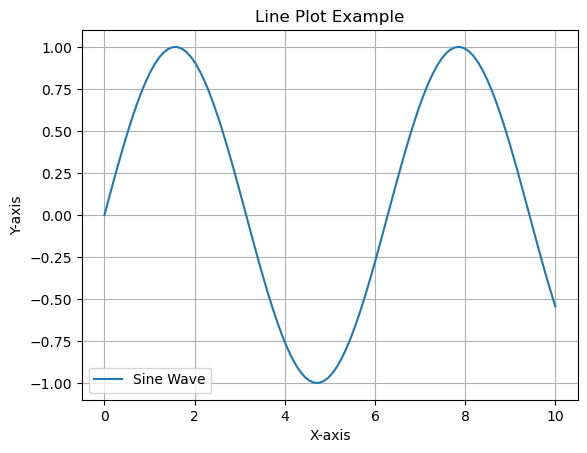

In [6]:
#1(Line plot with matplotlib)
x = np.linspace(0, 10, 100)
y = np.sin(x)
plt.plot(x, y, label='Sine Wave')
plt.title('Line Plot Example')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

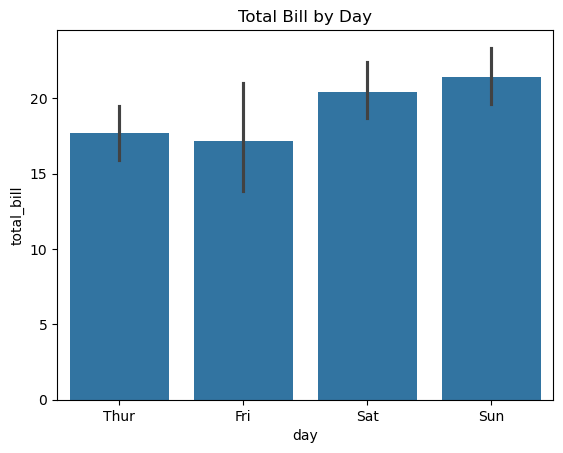

In [7]:
#2(barplot with seaborn)
data = sns.load_dataset('tips')
sns.barplot(x='day', y='total_bill', data=data)
plt.title('Total Bill by Day')
plt.show()

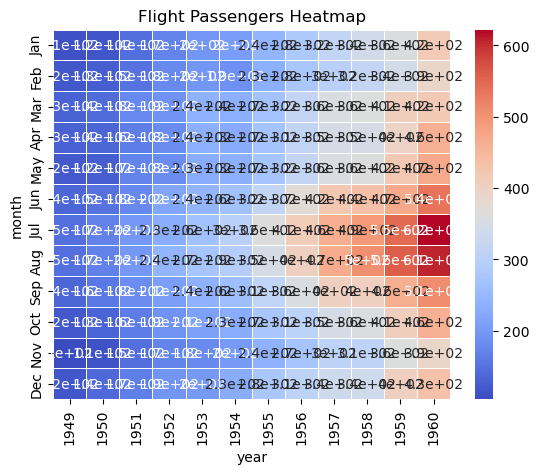

In [8]:
#3(Heatmap with seaborn)
flights = sns.load_dataset('flights')
corr = flights.pivot(index='month', columns='year', values='passengers')
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Flight Passengers Heatmap')
plt.show()

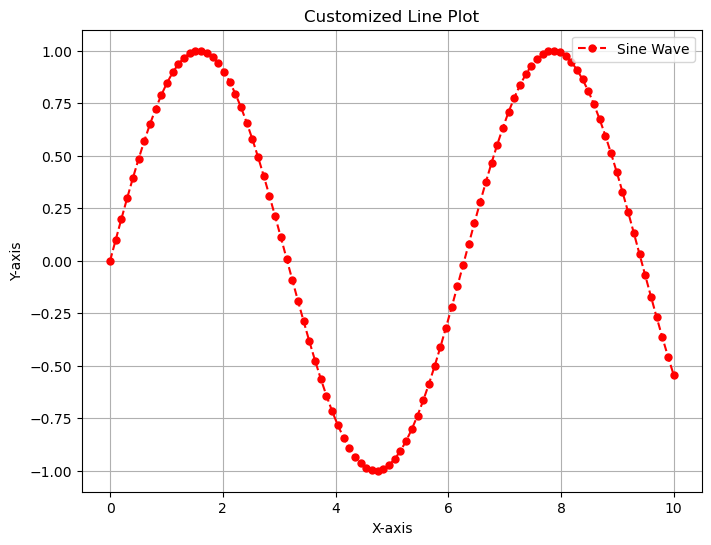

In [34]:
#1(Customizing the plots)
#Line plot with matplotlib
import matplotlib.pyplot as plt
x = np.linspace(0, 10, 100)
y = np.sin(x)
line_data = pd.DataFrame({'x': x, 'y': y})
plt.figure(figsize=(8, 6))
plt.plot(line_data['x'], line_data['y'], label='Sine Wave', color='red', linestyle='--', marker='o', markersize=5)
plt.title('Customized Line Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\mp12y\AppData\Local\Temp\ipykernel_8688\440194595.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Value', data=bar_data, palette='muted')


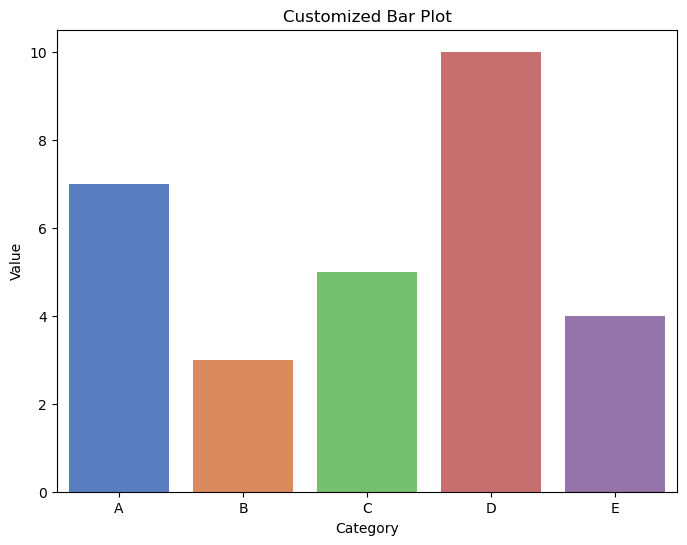

In [32]:
#2barplot with seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
bar_data = pd.DataFrame({
    'Category': ['A', 'B', 'C', 'D', 'E'],
    'Value': [7, 3, 5, 10, 4]
})
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Value', data=bar_data, palette='muted')
plt.title('Customized Bar Plot')
plt.show()

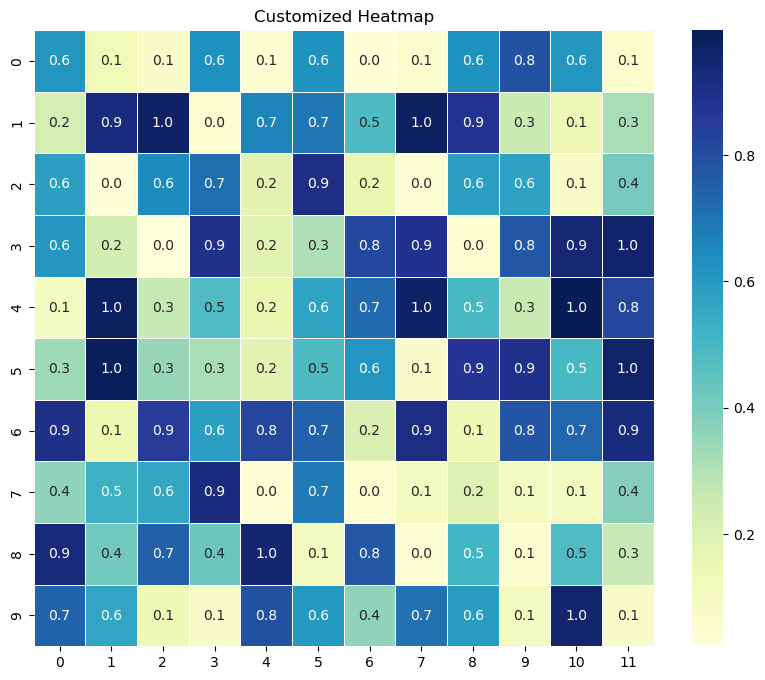

In [30]:
#3Heatmap with seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
heatmap_data = np.random.rand(10, 12)
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.1f', cbar=True, linewidths=0.5)
plt.title('Customized Heatmap')
plt.show()